## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [ ]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [1]:
import pandas as pd
customer_set = pd.read_csv("Mall_Customers.csv")
customer_set.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'SpendingScore'
}, inplace=True)
customer_set.head()


,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [2]:
print("Dataset attributes:")
print(customer_set.columns)

print("\nDataset shape:")
print(customer_set.shape)

print("\nStatistical summary:")
print(customer_set.describe())

print("\nMissing values:")
print(customer_set.isnull().sum())


Dataset attributes:
Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')

Dataset shape:
(200, 5)

Statistical summary:
       CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.750000   28.750000   41.500000      34.750000
50%    100.500000   36.000000   61.500000      50.000000
75%    150.250000   49.000000   78.000000      73.000000
max    200.000000   70.000000  137.000000      99.000000

Missing values:
CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64


## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [16]:
print(customer_set.columns)



Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')


**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

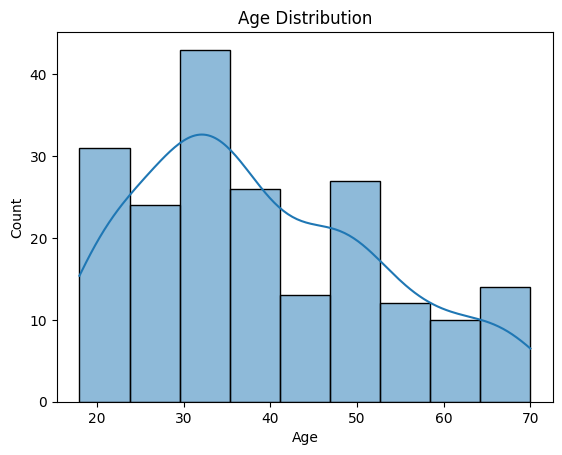

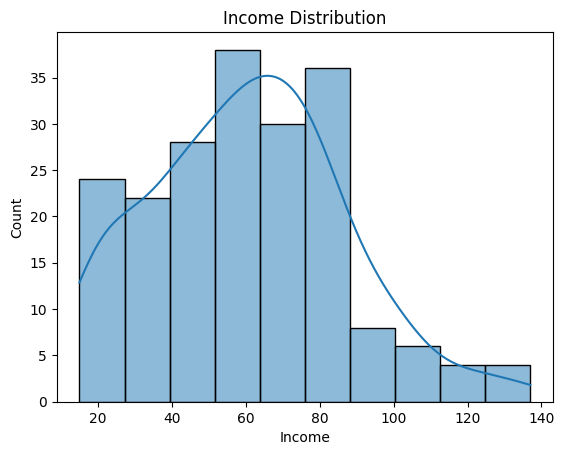

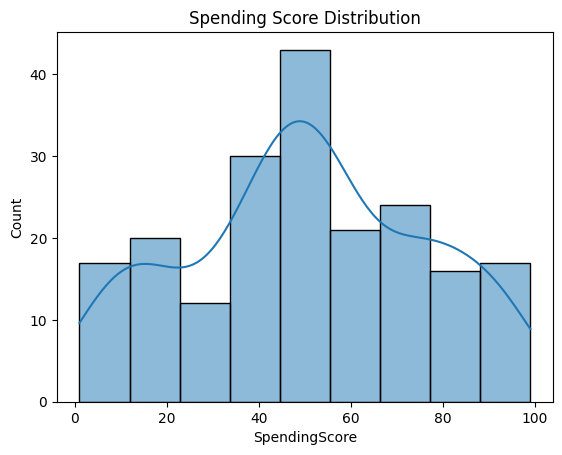

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(customer_set['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(customer_set['Income'], kde=True)
plt.title('Income Distribution')
plt.show()

sns.histplot(customer_set['SpendingScore'], kde=True)
plt.title('Spending Score Distribution')
plt.show()


**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

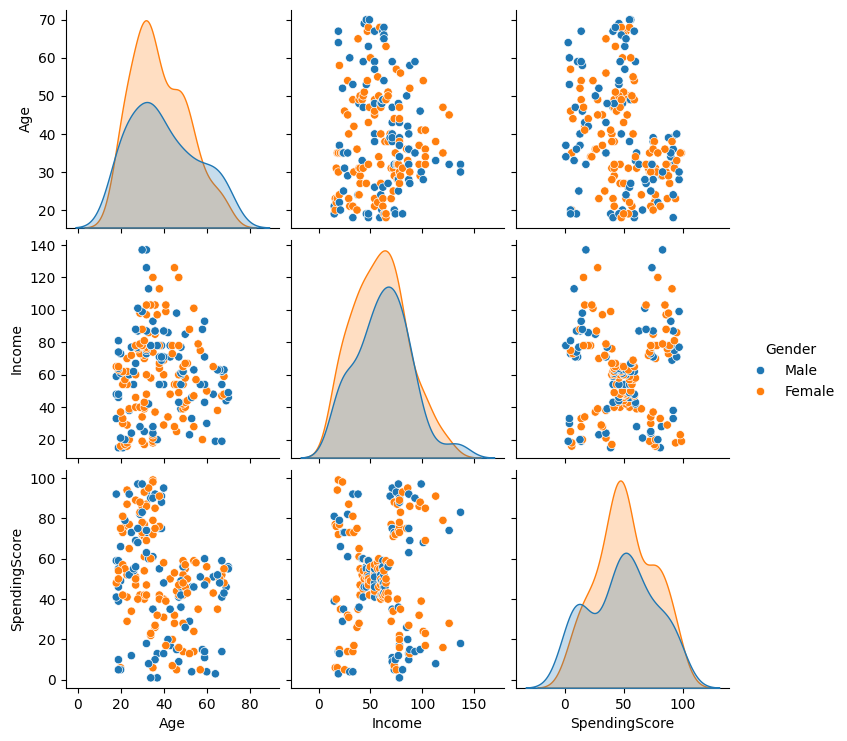

c:\Users\Artur\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'lw'
  cset = contour_func(
c:\Users\Artur\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'lw'
  cset = contour_func(
c:\Users\Artur\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'lw'
  cset = contour_func(


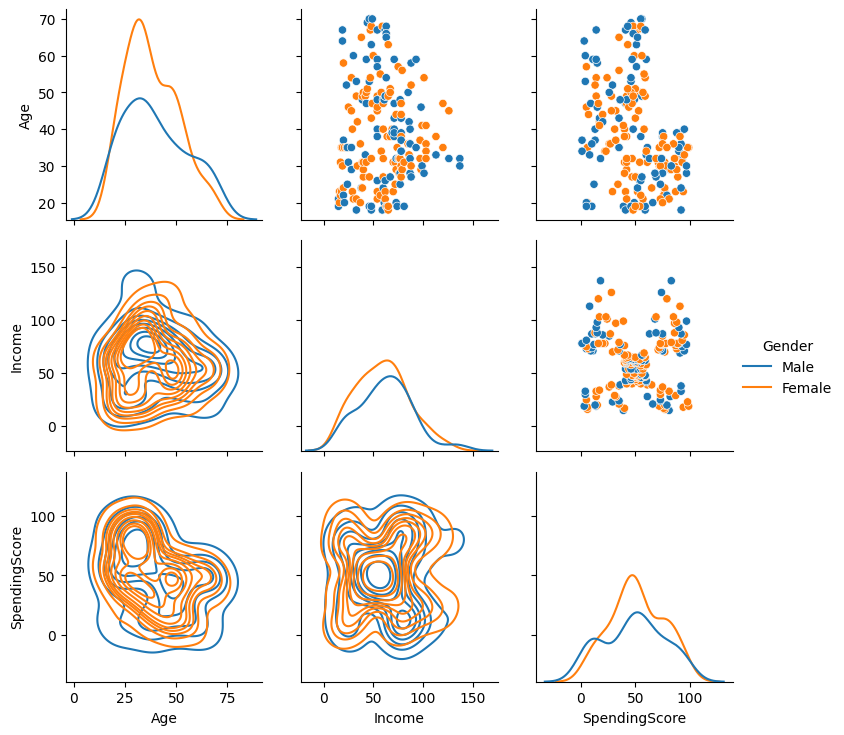

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(customer_set, hue='Gender', vars=['Age', 'Income', 'SpendingScore'])
plt.show()

g = sns.PairGrid(customer_set, hue="Gender", vars=['Age', 'Income', 'SpendingScore'])
g.map_upper(sns.scatterplot)
g.map_diag(sns.kdeplot)
g.map_lower(sns.kdeplot, lw=1)
g.add_legend()
plt.show()


**Висновки з 1-4 завдання (детальні)**

1.   CustomerID був видалений
2.   гістограми для 3 змінних
3.   видно різницю гендерів
4.   Немає прямої залежності між доходом та витратами.

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

Gender
Female    112
Male       88
Name: count, dtype: int64


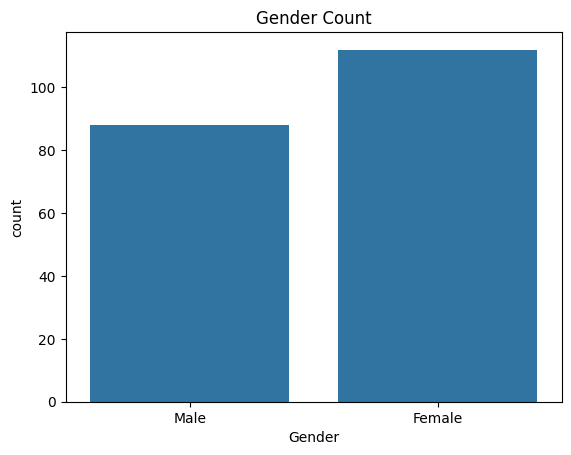

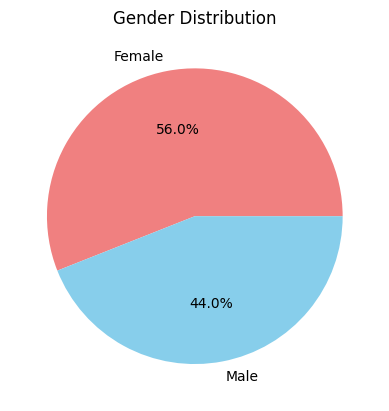

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Mall_Customers.csv")

df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'SpendingScore'
}, inplace=True)

print(df['Gender'].value_counts())

sns.countplot(x='Gender', data=df)
plt.title('Gender Count')
plt.show()

df['Gender'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'skyblue'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()


**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

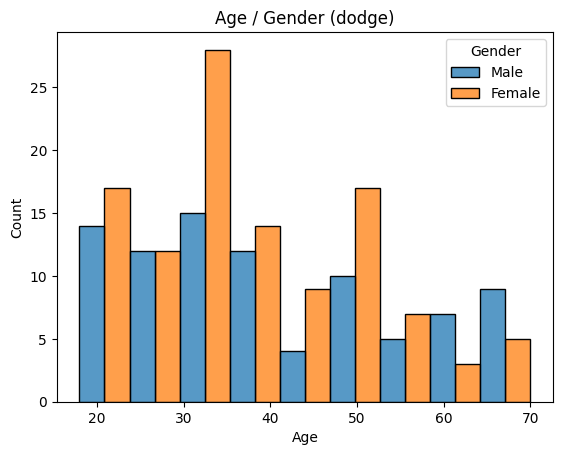

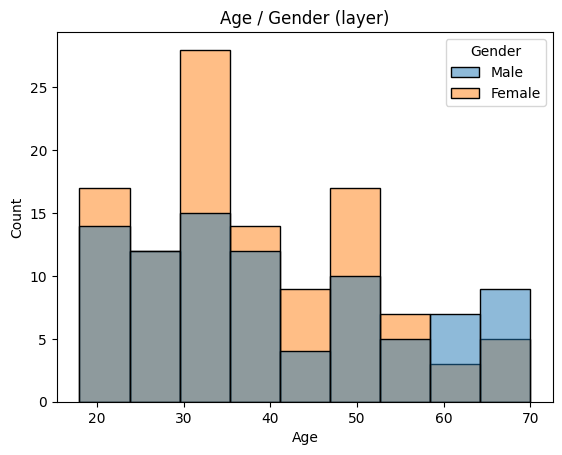

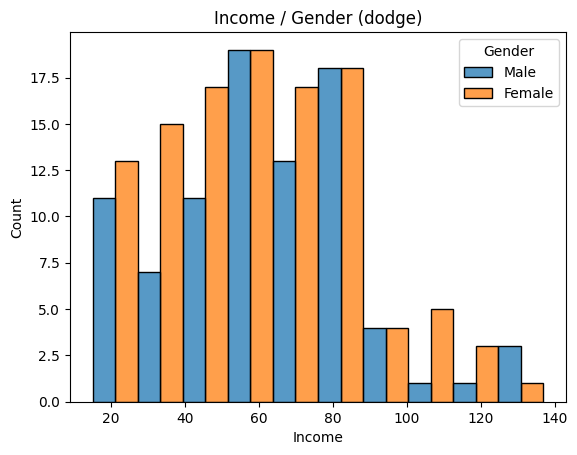

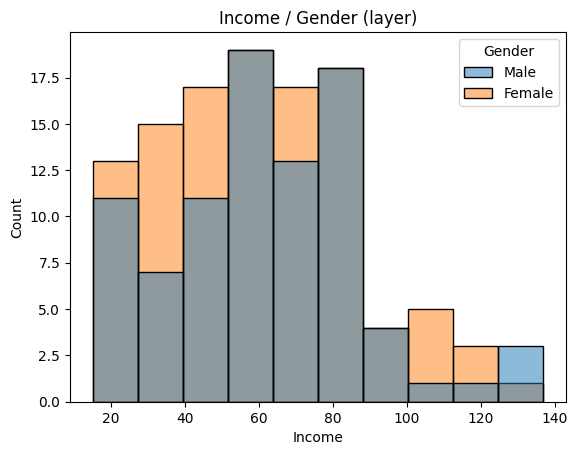

In [ ]:
sns.histplot(data=df, x='Age', hue='Gender', multiple='dodge')
plt.title('Age / Gender (dodge)')
plt.show()

sns.histplot(data=df, x='Age', hue='Gender', multiple='layer')
plt.title('Age / Gender (layer)')
plt.show()

sns.histplot(data=df, x='Income', hue='Gender', multiple='dodge')
plt.title('Income / Gender (dodge)')
plt.show()

sns.histplot(data=df, x='Income', hue='Gender', multiple='layer')І
plt.title('Income / Gender (layer)')
plt.show()


**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



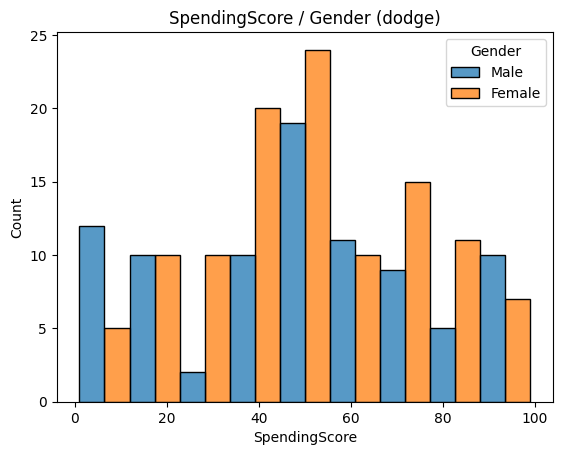

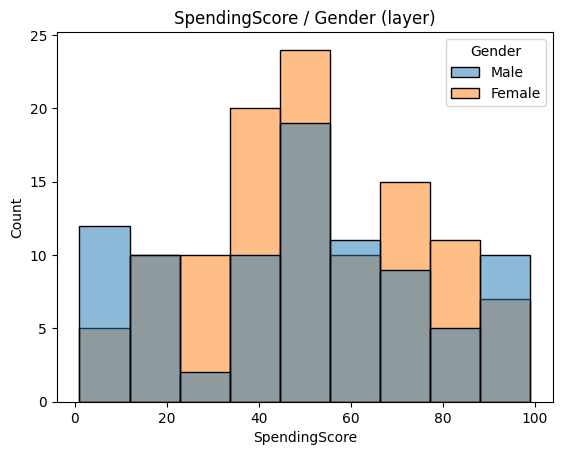

In [24]:
sns.histplot(data=df, x='SpendingScore', hue='Gender', multiple='dodge')
plt.title('SpendingScore / Gender (dodge)')
plt.show()

sns.histplot(data=df, x='SpendingScore', hue='Gender', multiple='layer')
plt.title('SpendingScore / Gender (layer)')
plt.show()


**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

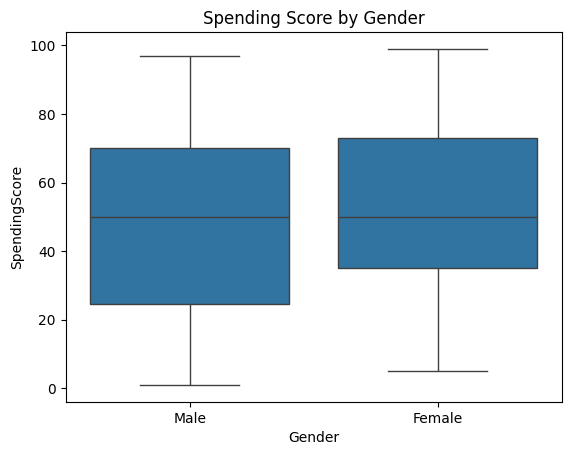

In [25]:
sns.boxplot(x='Gender', y='SpendingScore', data=df)
plt.title('Spending Score by Gender')
plt.show()


**Висновки з завдання 5 - 8(детальні)**

1.   Яке співвідношення груп чоловіків та жінок? - Жінок 112 чоловіків 88
2.  Подивитись які можна виділити групи і як розподілені витрати відностно статі людини? - більше молодших жінок,більше жінок заробляють до 60т, а чоловіки рівномірно, жінки більше витрачають в середньому
3. Чи є різниця між витратами у чоловіків та жінок? - в жінок вища медіана витрат і ширший розподі.
4. ...

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

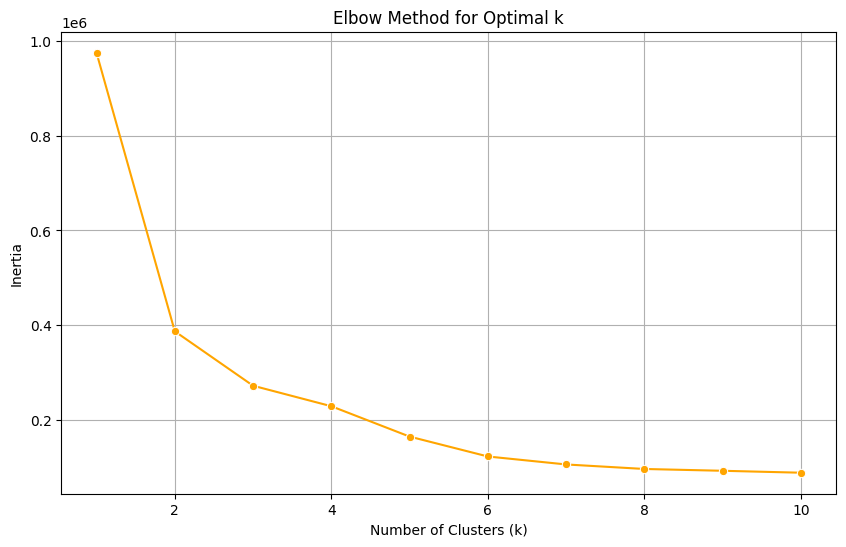

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv("Mall_Customers.csv")

df.rename(columns={
    'Annual Income (k$)': 'Income',
    'Spending Score (1-100)': 'SpendingScore'
}, inplace=True)

X = df.drop(['Gender'], axis=1)

inertias = []
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=0)
    model.fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(10, 6))
sns.lineplot(x=list(range(1, 11)), y=inertias, marker='o', color='orange')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


**Висновки з завдання 9 (детальні)** 

1.  Необхідно навести яка кількість кластерів на Вашу думку є оптимальною (краще розглянути для порівняння делька гіпотез про кількість кластерів)
2.  Оптимальною кількістю кластерів є 5, це видно на графіку (Elbow Method). Після точки k=5 крива згладжується, а зменшення інерції стає незначним.
3.  Занадто мала кількість кластерів (наприклад, k=2 або k=3) не дозволяє повноцінно відобразити різні типи клієнтів. 

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

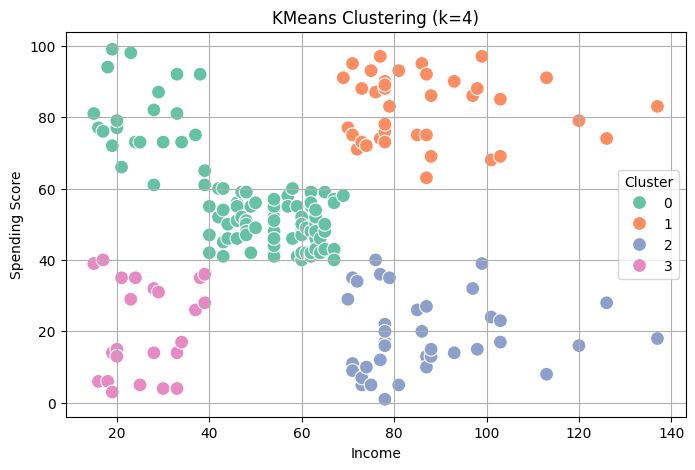

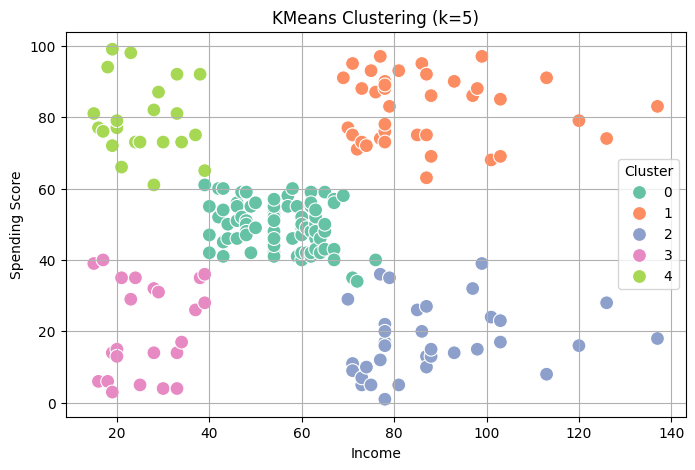

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
data = df[['Income', 'SpendingScore']]

for k in [4, 5]:
    model = KMeans(n_clusters=k, random_state=0)
    df[f'Cluster_{k}'] = model.fit_predict(data)

    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='Income', y='SpendingScore', hue=f'Cluster_{k}', palette='Set2', s=100)
    plt.title(f'KMeans Clustering (k={k})')
    plt.xlabel('Income')
    plt.ylabel('Spending Score')
    plt.legend(title='Cluster')
    plt.grid(True)
    plt.show()


**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [42]:
import plotly.express as px
from sklearn.cluster import KMeans

features = ['Age', 'Income', 'SpendingScore']
data = df[features]

for k in [4, 5]:
    df[f'Cluster_{k}'] = KMeans(n_clusters=k, random_state=0).fit_predict(data)
    fig = px.scatter_3d(
        df,
        x='Age',
        y='Income',
        z='SpendingScore',
        color=f'Cluster_{k}',
        title=f'3D KMeans Clustering (k={k})',
        opacity=0.8
    )
    fig.write_html(f'cluster3d_k{k}.html')


**Висновки з завдання 10 - 11 (детальні)** 

1. Визначитась з отриманих візуалізацій яка кількість кластерів є оптимальною на Вашу думку і провести аналіз кластерів, що Ви отримали.
2. Я порівняв два 3D-графіки з k=4 та k=5, оптимальною кількістю кластерів є 4
3. Кластер 0 (синій): Клієнти з середнім доходом і помірною витратною активністю
4. Кластер 1 (оранжевий): Заможні клієнти, які витрачають небагато — можливо, потенціал для маркетингу.
5. Кластер 2 (жовтий): Найцінніші клієнти — високий дохід і високі витрати.
6. Кластер 3 (фіолетовий): Клієнти з меншим доходом, але активними витратами.

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


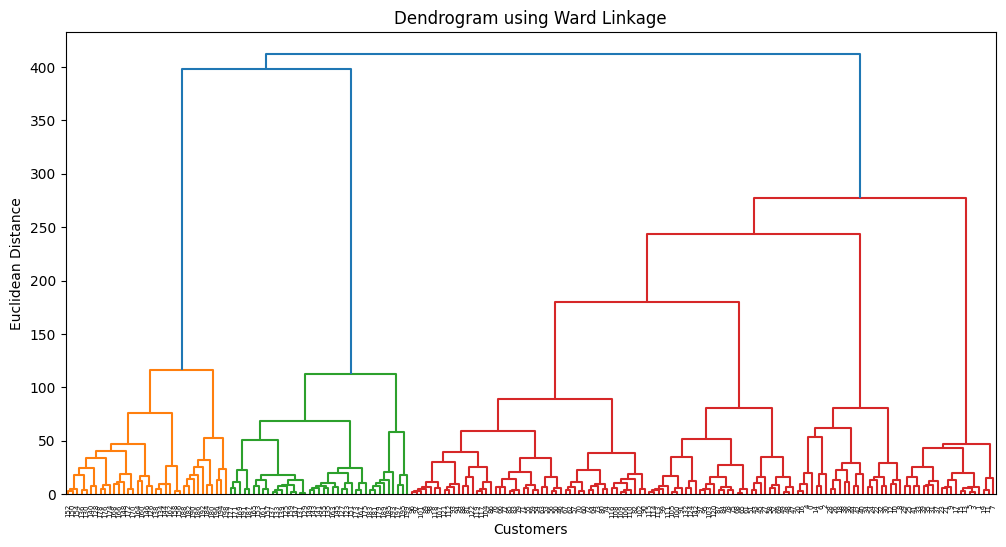

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

df = pd.read_csv('Mall_Customers.csv')
data = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

linked = linkage(data, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram using Ward Linkage')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()


**Висновки з завдання 12 (детальні)**

1. оптимально поділити дані на 5 кластерів, оскільки на цьому рівні з'єднуються великі групи.
2. Ward дозволила згрупувати клієнтів за схожістю у віці, доході та рівні витрат
3. ...

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

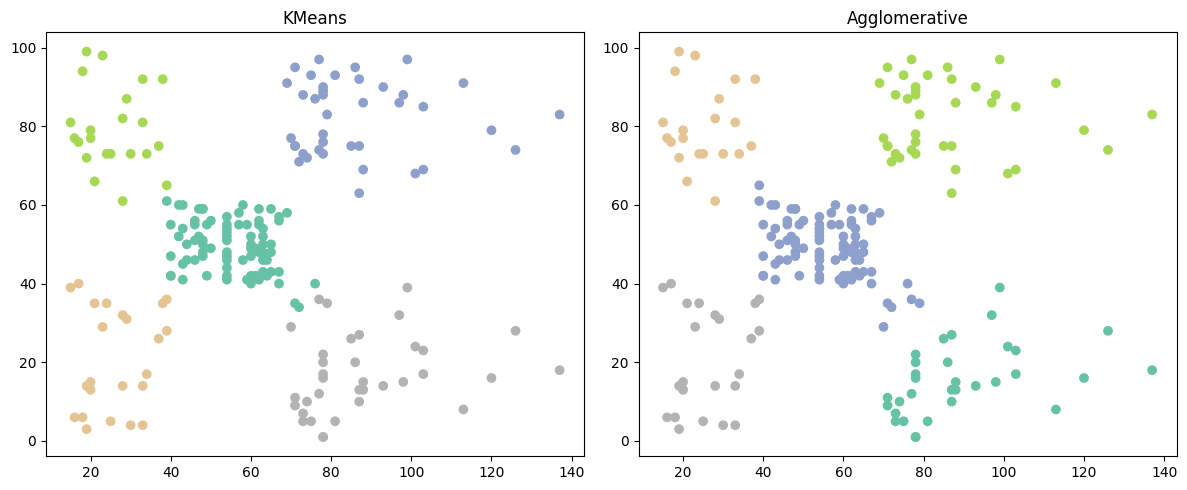

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering

df = pd.read_csv("Mall_Customers.csv")
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

k = 5
df['kmeans'] = KMeans(n_clusters=k).fit_predict(X)
df['agglo'] = AgglomerativeClustering(n_clusters=k).fit_predict(X)

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['kmeans'], cmap='Set2')
axs[0].set_title("KMeans")

axs[1].scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=df['agglo'], cmap='Set2')
axs[1].set_title("Agglomerative")

plt.tight_layout()
plt.show()


**Висновки з завдання 13 (детальні)**

1.   Оптимальною кількістю кластерів у даному випадку є 5, це підтверджується візуалізацією та ліктем.
2.   Обидва методи кластеризації (KMeans і Agglomerative) дозволяють чітко розділити клієнтів на 5 основних груп за ознаками доходу та споживчого балу
3.   Отримані результати допомагають краще зрозуміти поведінку клієнтів